In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
df=pd.read_csv('amazon.csv')

In [5]:
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [7]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [15]:
dt = df[['user_id', 'product_id', 'rating']]

In [17]:
dt.columns

Index(['user_id', 'product_id', 'rating'], dtype='object')

In [19]:
dt.head(2)

,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0


In [21]:
dt.dtypes

user_id       object
product_id    object
rating        object
dtype: object

In [35]:
df['rating'].head(5)

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: object

In [49]:
dt['rating'].isnull().sum()

1

In [51]:
mis = dt[dt['rating'].isnull()]

In [59]:
mis

,user_id,product_id,rating
1279,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...",B08L12N5H1,NaN


In [57]:
dt['rating'].fillna(0)

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64

In [61]:
dt.isnull().sum()

user_id       0
product_id    0
rating        0
dtype: int64

In [70]:
user_item_matrix=dt.pivot_table(index='user_id',columns='product_id',values='rating',fill_value=0)

In [72]:
user_item_matrix.head(2)

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q
user_id,,,,,,,,,,,,,,,,,,,,,
"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS6KRUEYNXJSQ,AGYPIE5BICV44WEEEPJVEFQOCJSQ,AFR7CEQKWZE53IHHOWBIPAMYKL4Q,AGBV7FBP4SEITF6UKRFKTV7O32IA,AHQVOY54QKPIQZIJ57JKCGQPVV3Q,AEMCVRRD3XQRGFHC2VFCXHJEMESQ,AFBWXU7DUWCIK5MRDCLBXWTWN7ZQ",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
item_similarity = cosine_similarity(user_item_matrix.T)

In [35]:
item_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [76]:
item_sim_df = pd.DataFrame(item_similarity, index = user_item_matrix.columns,columns= user_item_matrix.columns)

In [17]:
item_sim_df.index[:10]

Index(['B002PD61Y4', 'B002SZEOLG', 'B003B00484', 'B003L62T7W', 'B004IO5BMQ',
       'B005FYNT3G', 'B005LJQMCK', 'B005LJQMZC', 'B006LW0WDQ', 'B0073QGKAS'],
      dtype='object', name='product_id')

In [78]:
product_id = dt['product_id'].astype(str)

In [80]:
def recommended_products (product_id,similarity_matrix, n=30):
    if product_id not in similarity_matrix.index:
        print(f"Product id {product_id} Notr found in dataset.")
        print(f"Available Product IDs: {list(similarity_matrix.index)[:10]}")
        return []
    similar_products= similarity_matrix.loc[product_id].sort_values(ascending = False)
    recommended_products = similar_products.iloc[1:n+1]
    return recommended_products
    

In [82]:
product_id_to_recommended = 'B005LJQMCK'
recommended = recommended_products(product_id_to_recommended,item_sim_df)


In [84]:
print('Top 5 Recommended Products :')
print(recommended)

Top 5 Recommended Products :
product_id
B005LJQMZC    1.0
B002PD61Y4    0.0
B09FHHTL8L    0.0
B09GFLXVH9    0.0
B09GBBJV72    0.0
B09GB5B4BK    0.0
B09G5TSGXV    0.0
B09G2VTHQM    0.0
B09FZ89DK6    0.0
B09FPP3R1D    0.0
B09FKDH6FS    0.0
B09F9YQQ7B    0.0
B09FFK1PQG    0.0
B09GFN8WZL    0.0
B09F6VHQXB    0.0
B09F6S8BT6    0.0
B09F6KL23R    0.0
B09F6D21BY    0.0
B09F5Z694W    0.0
B09F3PDDRF    0.0
B09DSXK8JX    0.0
B09GFM8CGS    0.0
B09GFPN6TP    0.0
B09DL9978Y    0.0
B09GFPVD9Y    0.0
B09J2SCVQT    0.0
B09J2QCKKM    0.0
B09J2MM5C6    0.0
B09HV71RL1    0.0
B09HSKYMB3    0.0
Name: B005LJQMCK, dtype: float64


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
def visualize_recommendation(product_id, similarity_matrix, n=6):
    recommended_items = recommended_products(product_id,similarity_matrix,n)
    if len(recommended_items)==0:
        print("No recommendations to visualize")
        return
    plt.figure(figsize=(10,5))
    sns.barplot(y=recommended_items.index, x= recommended_items.values, palette='viridis')

    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Product id')
    plt.title(f" Top {n}Recommendation System for{product_id}",fontweight='bold')
    plt.show()


/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_1612/3437520266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=recommended_items.index, x= recommended_items.values, palette='viridis')


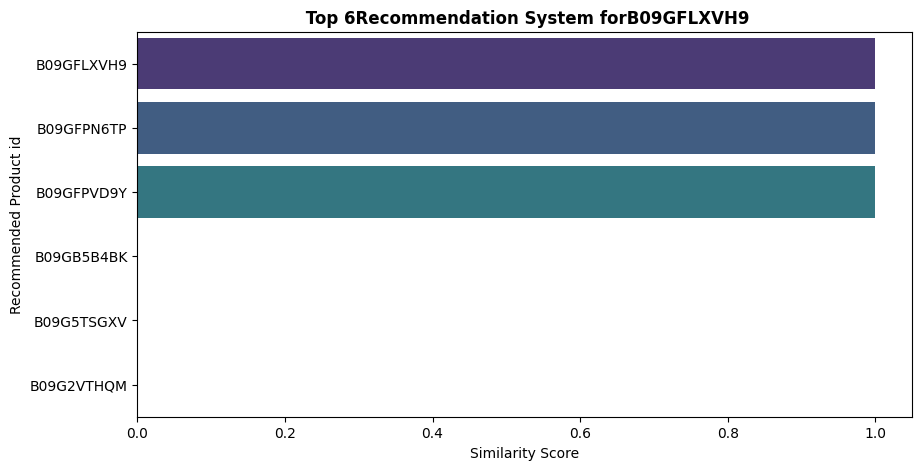

In [98]:
visualize_recommendation('B09GFLXVH9',item_sim_df)